# Home Credit Default Risk Analysis

## 1. Introduction - Business Statement

A significant portion of the population, particularly those with insufficient or non-existent credit histories, struggle to obtain loans at Home Credit. This population is often vulnerable to untrustworthy lenders who may take advantage of them. Home Credit looks to address this problem by providing a positive and safe borrowing experience for the unbanked population. The goal for this project will be the reduction in loan rejections for creditworthy individuals, and the improvement in clients' loan repayment rates compared to previous methods by using the target variable of whether a client is likely to repay the loan or not.

## 2. Some of my questions before Analysis

- Is the data unbalanced with respect to the target? 
- What would the accuracy be for a simple model consisting in a majority class classifier?
- Do the values make sense?
- Are there columns with near-zero or zero variance?
- Is there enough data here to make an ML model?
- How many observations do we have?
- How many continuous and categorical variables there are?
- What is the data type of each variable?
- Do we have null values? What to do, remove rows?  Remove columns?  Impute?
- Are there duplicate values?
- What is the distribution of each variable?
- Do we have outliers?
- In the summary statistics table, are the max/min values reasonable for the variables? Do we see any values that look like errors?
- What is the mean for each variable? What do the means say about our dataset as a whole?
- What would be the best statistical method?

## 3. Data Overview

The Home Credit dataset is based on a real-world situation, provided by Home Credit. The dataset contains several tables with huge amount of data which has information about the loan applicant, credit scores of an applicant, their repayment history. The aim of this dataset is to create a predictive model that can accurately gauge the likelihood of loan default by the new applicants.

### Loading Packages

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold

### Description of the data

In [120]:
app_train_data= pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")
app_bureau=pd.read_csv("bureau.csv")

In [121]:
app_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,years_employed,app AMT_CREDIT / AMT_ANNUITY,app EXT_SOURCE mean,app EXT_SOURCE_1 / DAYS_BIRTH,app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY,app AMT_INCOME_TOTAL / AMT_ANNUITY,app AMT_INCOME_TOTAL - AMT_GOODS_PRICE
0,100001,0,0,0,1,0,11.813037,13.251286,20560.5,450000.0,...,0.0,0.0,52.715068,6.380822,0.000645,0.567263,-0.000039,-20559.515580,0.000575,-4.499882e+05
1,100005,0,1,0,1,0,11.502885,12.313891,17370.0,180000.0,...,0.0,3.0,49.490411,12.243836,0.000709,0.429869,-0.000031,-17369.041426,0.000662,-1.799885e+05
2,100013,0,1,1,1,0,12.218500,13.404930,69777.0,630000.0,...,1.0,4.0,54.898630,12.213699,0.000192,0.655389,NaN,-69775.981792,0.000175,-6.299878e+05
3,100028,0,0,0,1,2,12.660331,14.269766,49018.5,1575000.0,...,0.0,3.0,38.290411,5.112329,0.000291,0.549372,-0.000038,-49017.444972,0.000258,-1.574987e+06
4,100038,0,1,1,0,1,12.100718,13.346308,32067.0,625500.0,...,NaN,NaN,35.726027,6.002740,0.000416,0.313916,-0.000016,-32065.991607,0.000377,-6.254879e+05


In [81]:
app_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Let us focus on app_train_data for now

In [13]:
#Majority class classifier count

In [122]:
target_counts=app_train_data['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

#pd.concat(target_Counts,target_percent)
target_counts

0    282686
1     24825
Name: TARGET, dtype: int64

Inmediatly we see a big majority of customer on the non default category. 

In [123]:
app_train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [124]:
# Number of rows and columns
app_train_data.shape

(307511, 122)

In [125]:
app_train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [128]:
app_train_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

We can see there there are columns that do have null values. This will need to be cleaned.

### Distribution of Age

Text(0, 0.5, 'Count')

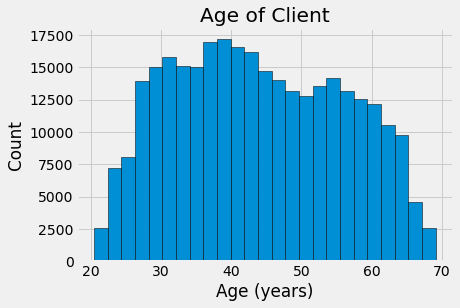

In [51]:
# Age distribution

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

We can see that age distribution is almost normal and most of the people are between 30 and 40 years

### Distribution of AMT_CREDIT

C:\Users\litzy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


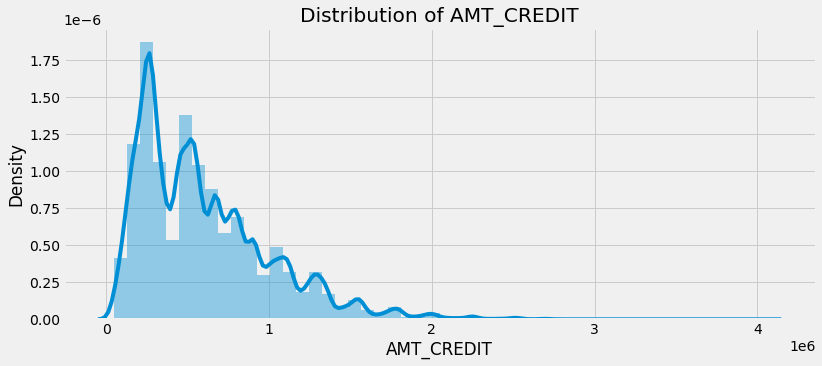

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train_data["AMT_CREDIT"])

### Data is balanced or imbalanced

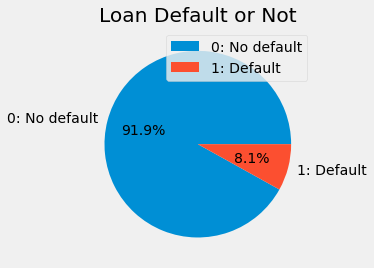

In [47]:
#plot target
default = ["0: No default", "1: Default"]
plt.pie(temp, labels =default, autopct='%1.1f%%')
plt.title("Loan Default or Not")
plt.legend()
plt.show()

As we can see above, the data is highly imbalanced. This is expected given Home Credit's business model. Defaults should be significantly fewer than non defaults.

In [48]:
pd.crosstab(app_train_data.NAME_TYPE_SUITE, app_train_data.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_TYPE_SUITE,,,,,,
Children,253,1940,318,378,0,378
Family,3702,28617,1747,4150,0,1933
Group of people,29,165,20,44,0,13
Other_A,147,340,70,268,0,41
Other_B,171,854,132,486,0,127
"Spouse, partner",1247,9685,74,345,0,19
Unaccompanied,24112,154047,17334,39529,0,13504


It is interesting to see that these two variables sometimes contradict each other. For example, separated, single or widowed applicants were sometimes accompanied by their partner. I suppose this means unofficial relationships? Also sometimes children accompanied the applicant. Maybe these were adult childred?

C:\Users\litzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of housing type')

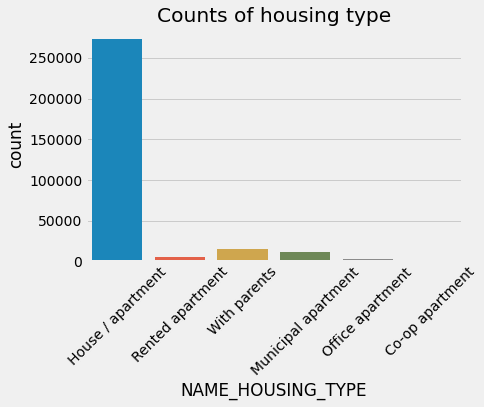

In [49]:
sns.countplot(app_train_data['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')

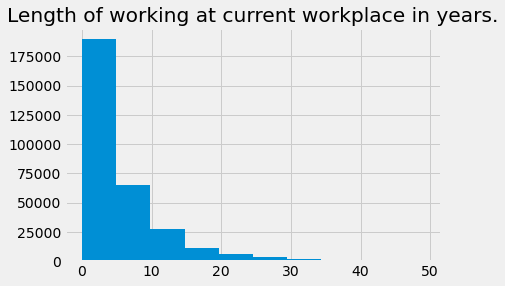

In [50]:
app_train_data.loc[app_train_data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
app_train_data['years_employed'] = app_train_data['DAYS_EMPLOYED'] / -365
plt.hist(app_train_data['years_employed']);
plt.title('Length of working at current workplace in years.');

### Missing Values Percentages

In [133]:
def missing_values_table(df):
        # Total missing values
        missing_val = df.isnull().sum() 
        # Percentage of missing values
        missing_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
        # Rename the columns
        missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentage of Missing Values'})
        # Sort the table by percentage of missing descending
        missing_val_table_ren_columns = missing_val_table_ren_columns[
            missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage of Missing Values', ascending=False).round(1) 
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
       
        # Return the dataframe with missing information
        return missing_val_table_ren_columns

In [130]:
missing_values_table(app_train_data)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,Percentage of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


### DROPPING COLUMNS WITH MISSING VALUES>66%

In [135]:
app_train_data = app_train_data[app_train_data['CODE_GENDER'] != 'XNA'].replace({'F': 0, 'M': 1})
app_train_data['CODE_GENDER'].value_counts()

0    202448
1    105059
Name: CODE_GENDER, dtype: int64

In [136]:
threshold = 66  # Setting the threshold percentage

# Calculating the total and percentage of missing values for each column
total = app_train_data.isnull().sum()
percentage = (app_train_data.isnull().sum() / app_train_data.isnull().count()) * 100

# Creating a mask to identify columns with more than the threshold percentage of missing values
mask = percentage > threshold

# Select the columns to remove
columns_to_remove = total[mask].index

# Remove the columns from the DataFrame
app_train_data = app_train_data.drop(columns=columns_to_remove)

In [137]:
app_train_data.shape

(307507, 106)

We got down the number of columns from 122 to 106, by removing columns which are unecessary to deal with 

### Finding missing values for our categorical variables

In [138]:
#finding out the categorical columns before factorizing them
columns = app_train_data.columns

# Create an empty list to store the categorical columns
categorical_columns = []

# Iterate over each column and check if it has a non-numeric data type
for column in columns:
    if app_train_data[column].dtype != 'int64' and app_train_data[column].dtype != 'float64':
        categorical_columns.append(column)

# Print the list of categorical columns
print("Categorical columns are :")
print(categorical_columns)
print("The number of categorical columns are:",len(app_train_data.select_dtypes(include=['object']).columns))

Categorical columns are :
['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
The number of categorical columns are: 14


In [139]:
columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

missing_values = app_train_data[columns].isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

if len(columns_with_missing_values) > 0:
    print("The following columns have missing values:")
    for column in columns_with_missing_values:
        print(column)
else:
    print("No missing values found in the specified columns.")

The following columns have missing values:
NAME_TYPE_SUITE
OCCUPATION_TYPE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [140]:
# List of categorical columns with missing values
categorical_columns = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Replace missing values with "Missing" in the categorical columns
for column in categorical_columns:
    app_train_data[column] = app_train_data[column].fillna("Missing")


In [141]:
app_train_data.shape

(307507, 106)

In [ ]:
##### Occupation type has a lot of missing values. It will be fixed by replacing na with 'unknown' 

In [142]:
categorical_columns = ['OCCUPATION_TYPE']
for column in categorical_columns:
    if app_train_data[column].isnull().sum() > 0:
        app_train_data[column].fillna('Unknown', inplace=True)

In [143]:
app_train_data['OCCUPATION_TYPE'].value_counts()

Missing                  96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### Performing level encoding/ one hot encoding

In [144]:
app_train_data.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

In [145]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Define the dataframe 'df' containing the columns

# Define the columns to label encode based on values <= 2
columns_to_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']

# Label encode the selected columns
label_encoder = LabelEncoder()

for column in columns_to_encode:
    if app_train_data[column].nunique() == 2:  # Check if number of unique values is less than or equal to 2
        app_train_data[column] = label_encoder.fit_transform(app_train_data[column])

# Print the encoded dataframe
print(app_train_data)


        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            1             0   
1           100003       0                   0            0             0   
2           100004       0                   1            1             1   
3           100006       0                   0            0             0   
4           100007       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            1             0   
307507      456252       0                   0            0             0   
307508      456253       0                   0            0             0   
307509      456254       1                   0            0             0   
307510      456255       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

In [146]:
# Define a list of categorical columns to be one-hot encoded
categorical_columns =['NAME_TYPE_SUITE',
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                   'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE','NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


# Perform one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(app_train_data, columns=categorical_columns)

# Print the encoded DataFrame
df_encoded.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,1,0,0,1,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,1,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,1,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0,0,0,1,0,0


### Modifying numerical value columns

In [147]:
# Assuming your dataset is stored in a variable named 'df'
numerical_columns = df_encoded.select_dtypes(include='number').columns
missing_value_counts = df_encoded[numerical_columns].isnull().sum()
total_values = len(app_train_data)

missing_value_percentages = (missing_value_counts / total_values) * 100

numerical_columns_with_missing_values = missing_value_percentages[missing_value_percentages > 0]
print(numerical_columns_with_missing_values)

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090404
OWN_CAR_AGE                     65.991018
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381156
EXT_SOURCE_2                     0.214629
EXT_SOURCE_3                    19.825565
APARTMENTS_AVG                  50.750064
BASEMENTAREA_AVG                58.516391
YEARS_BEGINEXPLUATATION_AVG     48.781329
ELEVATORS_AVG                   53.296348
ENTRANCES_AVG                   50.349098
FLOORSMAX_AVG                   49.761144
LANDAREA_AVG                    59.376860
LIVINGAREA_AVG                  50.193654
NONLIVINGAREA_AVG               55.179232
APARTMENTS_MODE                 50.750064
BASEMENTAREA_MODE               58.516391
YEARS_BEGINEXPLUATATION_MODE    48.781329
ELEVATORS_MODE                  53.296348
ENTRANCES_MODE                  50.349098
FLOORSMAX_MODE                  49.761144
LANDAREA_MODE                   59.376860
LIVINGAREA_MODE                 50

DAYS_EMPLOYED column has 365243 as a na value. We are replacing this by the column mean as shown below 

### Fixing OWN_CAR_AGE values

In [148]:
def process_own_car_age(df):
    df_encoded['OWN_CAR_AGE'].fillna(0, inplace=True)
    df_encoded['OWN_CAR_AGE'] = df_encoded['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))
    return df_encoded
process_own_car_age(df_encoded)
df_encoded['OWN_CAR_AGE'].value_counts()

C:\Users\litzy\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


3    259225
1     38026
2      8122
0      2134
Name: OWN_CAR_AGE, dtype: int64

In [149]:
df_encoded['DAYS_EMPLOYED']=df_encoded['DAYS_EMPLOYED'].abs()

mean_value = df_encoded.loc[df_encoded['DAYS_EMPLOYED'] != 365243, 'DAYS_EMPLOYED'].mean()
df_encoded['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)
df_encoded['DAYS_EMPLOYED'].describe()

C:\Users\litzy\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Replacing all the na values with the median 

In [150]:
numerical_columns = df_encoded.select_dtypes(include=np.number).columns

numerical_columns.isna().sum()

0

DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_EMPLOYED have negative values which are converted to positive using the below code

In [151]:
df_encoded['DAYS_BIRTH']=df_encoded['DAYS_BIRTH'].abs()
df_encoded['DAYS_REGISTRATION']=df_encoded['DAYS_REGISTRATION'].abs()
df_encoded['DAYS_ID_PUBLISH']=df_encoded['DAYS_ID_PUBLISH'].abs()
df_encoded['DAYS_EMPLOYED']=df_encoded['DAYS_EMPLOYED'].abs()

In [152]:
print(df_encoded['DAYS_BIRTH'].describe())
print(df_encoded['DAYS_REGISTRATION'].describe())
print(df_encoded['DAYS_ID_PUBLISH'].describe())
print(df_encoded['DAYS_EMPLOYED'].describe())

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
count    307507.000000
mean       4986.131376
std        3522.883030
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64
count    307507.000000
mean       2994.201670
std        1509.454566
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64
count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [153]:
df_encoded.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,1,0,0,1,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,1,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,1,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0,0,0,1,0,0


### Correlations

In [154]:
correlations = df_encoded.corr()['TARGET'].sort_values(ascending= False)

In [155]:
correlations.head(10)

TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.060895
REGION_RATING_CLIENT                                 0.058901
NAME_INCOME_TYPE_Working                             0.057483
DAYS_LAST_PHONE_CHANGE                               0.055219
CODE_GENDER                                          0.054710
REG_CITY_NOT_WORK_CITY                               0.050992
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049822
FLAG_EMP_PHONE                                       0.045984
REG_CITY_NOT_LIVE_CITY                               0.044394
Name: TARGET, dtype: float64

This result shows the feature importance scores for predicting the target variable. The "TARGET" feature has a perfect correlation with itself (1.0), which is expected since it represents the target variable. Among other features, "REGION_RATING_CLIENT_W_CITY" has the highest correlation (0.060893), followed closely by "REGION_RATING_CLIENT" (0.058899) and "NAME_INCOME_TYPE_Working" (0.057481). The rest of the features have relatively lower correlations. These feature importance scores can be helpful for understanding which variables contribute more significantly to the model's predictions.

In [156]:
df_encoded.shape

(307507, 266)

In [157]:
is_inf = np.isinf(df_encoded).any()

# Check for NaN values
is_nan = df_encoded.isnull().any()

# Get the columns with infinite values
columns_with_inf = is_inf[is_inf].index.tolist()

# Get the columns with NaN values
columns_with_nan = is_nan[is_nan].index.tolist()

# Print the columns with infinite values
if columns_with_inf:
    print("Columns with infinite values:")
    print(columns_with_inf)
else:
    print("No columns with infinite values")

# Print the columns with NaN values
if columns_with_nan:
    print("Columns with NaN values:")
    print(columns_with_nan)
else:
    print("No columns with NaN values")

No columns with infinite values
Columns with NaN values:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_Q

### Balancing data

In [158]:
balanceddf = pd.concat((df_encoded[df_encoded["TARGET"]==1], \
                        df_encoded[df_encoded["TARGET"]==0]. 
                        sample(n=int(df_encoded[df_encoded["TARGET"]==1].shape[0]*(65/35)))))
balanceddf.shape

(70928, 266)

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score


# Separate the features (X) and the target variable (y)
X = balanceddf.drop('TARGET', axis=1)
y = balanceddf['TARGET']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target variable on the training and testing sets
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate the AUC scores
train_auc = roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)


Train Accuracy: 0.7185858799478341
Test Accuracy: 0.7160580854363457
Train AUC: 0.750850407773469
Test AUC: 0.7486531407060418


C:\Users\litzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



The provided results showcase the performance of a classification model after performing Random Forest On the training dataset, the model achieves an accuracy of approximately 71.86%, which means that it correctly classifies about 71.86% of the instances in the training set. Similarly, on the separate test dataset, the model's accuracy stands at around 71.61%, indicating its ability to generalize its predictions to unseen data. Moving to the AUC metrics, which assess the model's ability to distinguish between positive and negative instances, the model yields a moderate performance on both the training and test data with AUC values of 0.7508 and 0.7487, respectively. While these results demonstrate the model's competency in tackling the classification problem, there may still be room for further refinement and improvement. Therefore, it was crucial to consider other evaluation metrics and conduct a more in-depth analysis to ascertain the model's overall suitability for the specific use case or problem domain.